# Tarea N°02

## Instrucciones

1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.


* __Nombre__: Cristóbal Lobos

* __Rol__: 201610519-0

2.- Debes _pushear_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [6]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [7]:
digits['target'].unique() 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Solo hay 9 valores target.

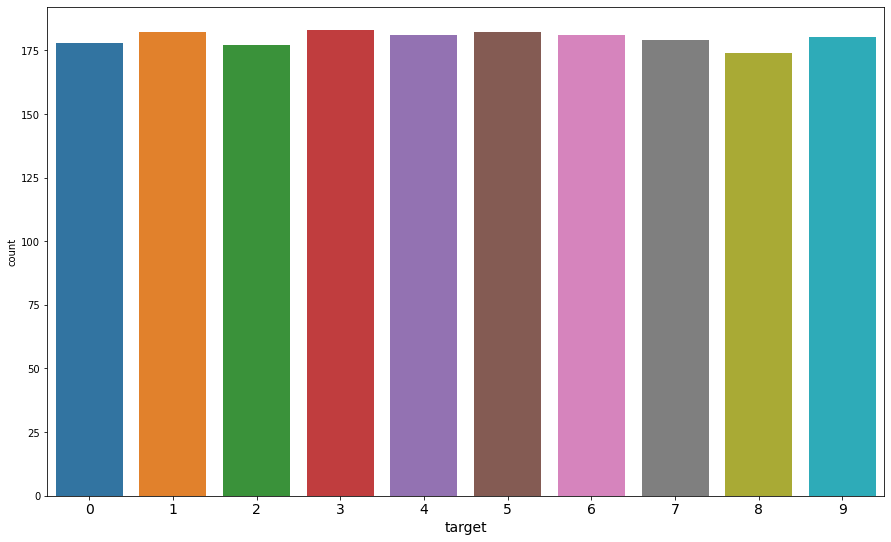

In [8]:
plt.figure(figsize=(15, 9)) #creacion grafico
ax = sns.countplot(x="target",palette="tab10", data=digits)
plt.xlabel('target',fontsize = 14)
plt.xticks(fontsize=14)
plt.show()

Veamos los valores unicos de las 6 primeras columnas.

In [9]:
print('Valores unicos c00' +str(digits['c00'].unique()))
print('Valores unicos c01' +str(digits['c01'].unique()))
print('Valores unicos c02' +str(digits['c02'].unique()))
print('Valores unicos c03' +str(digits['c03'].unique()))
print('Valores unicos c04' +str(digits['c04'].unique()))
print('Valores unicos c05' +str(digits['c05'].unique()))

Valores unicos c00[0]
Valores unicos c01[0 2 5 1 6 3 4 7 8]
Valores unicos c02[ 5  0  7 12  9 11  1 10  6  3  8  2 13 15  4 14 16]
Valores unicos c03[13 12  4 15  1 10  8 14  9  0  7  2 16 11  5  3  6]
Valores unicos c04[ 9 13 15 11  0  8 14  1 16  4  5 12  7 10  2  6  3]
Valores unicos c05[ 1  5 12  0 16 11 13  9 10  7 14  2  3  8  6  4 15]


In [10]:
digits.describe()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


C:\Users\benit\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\benit\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\benit\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


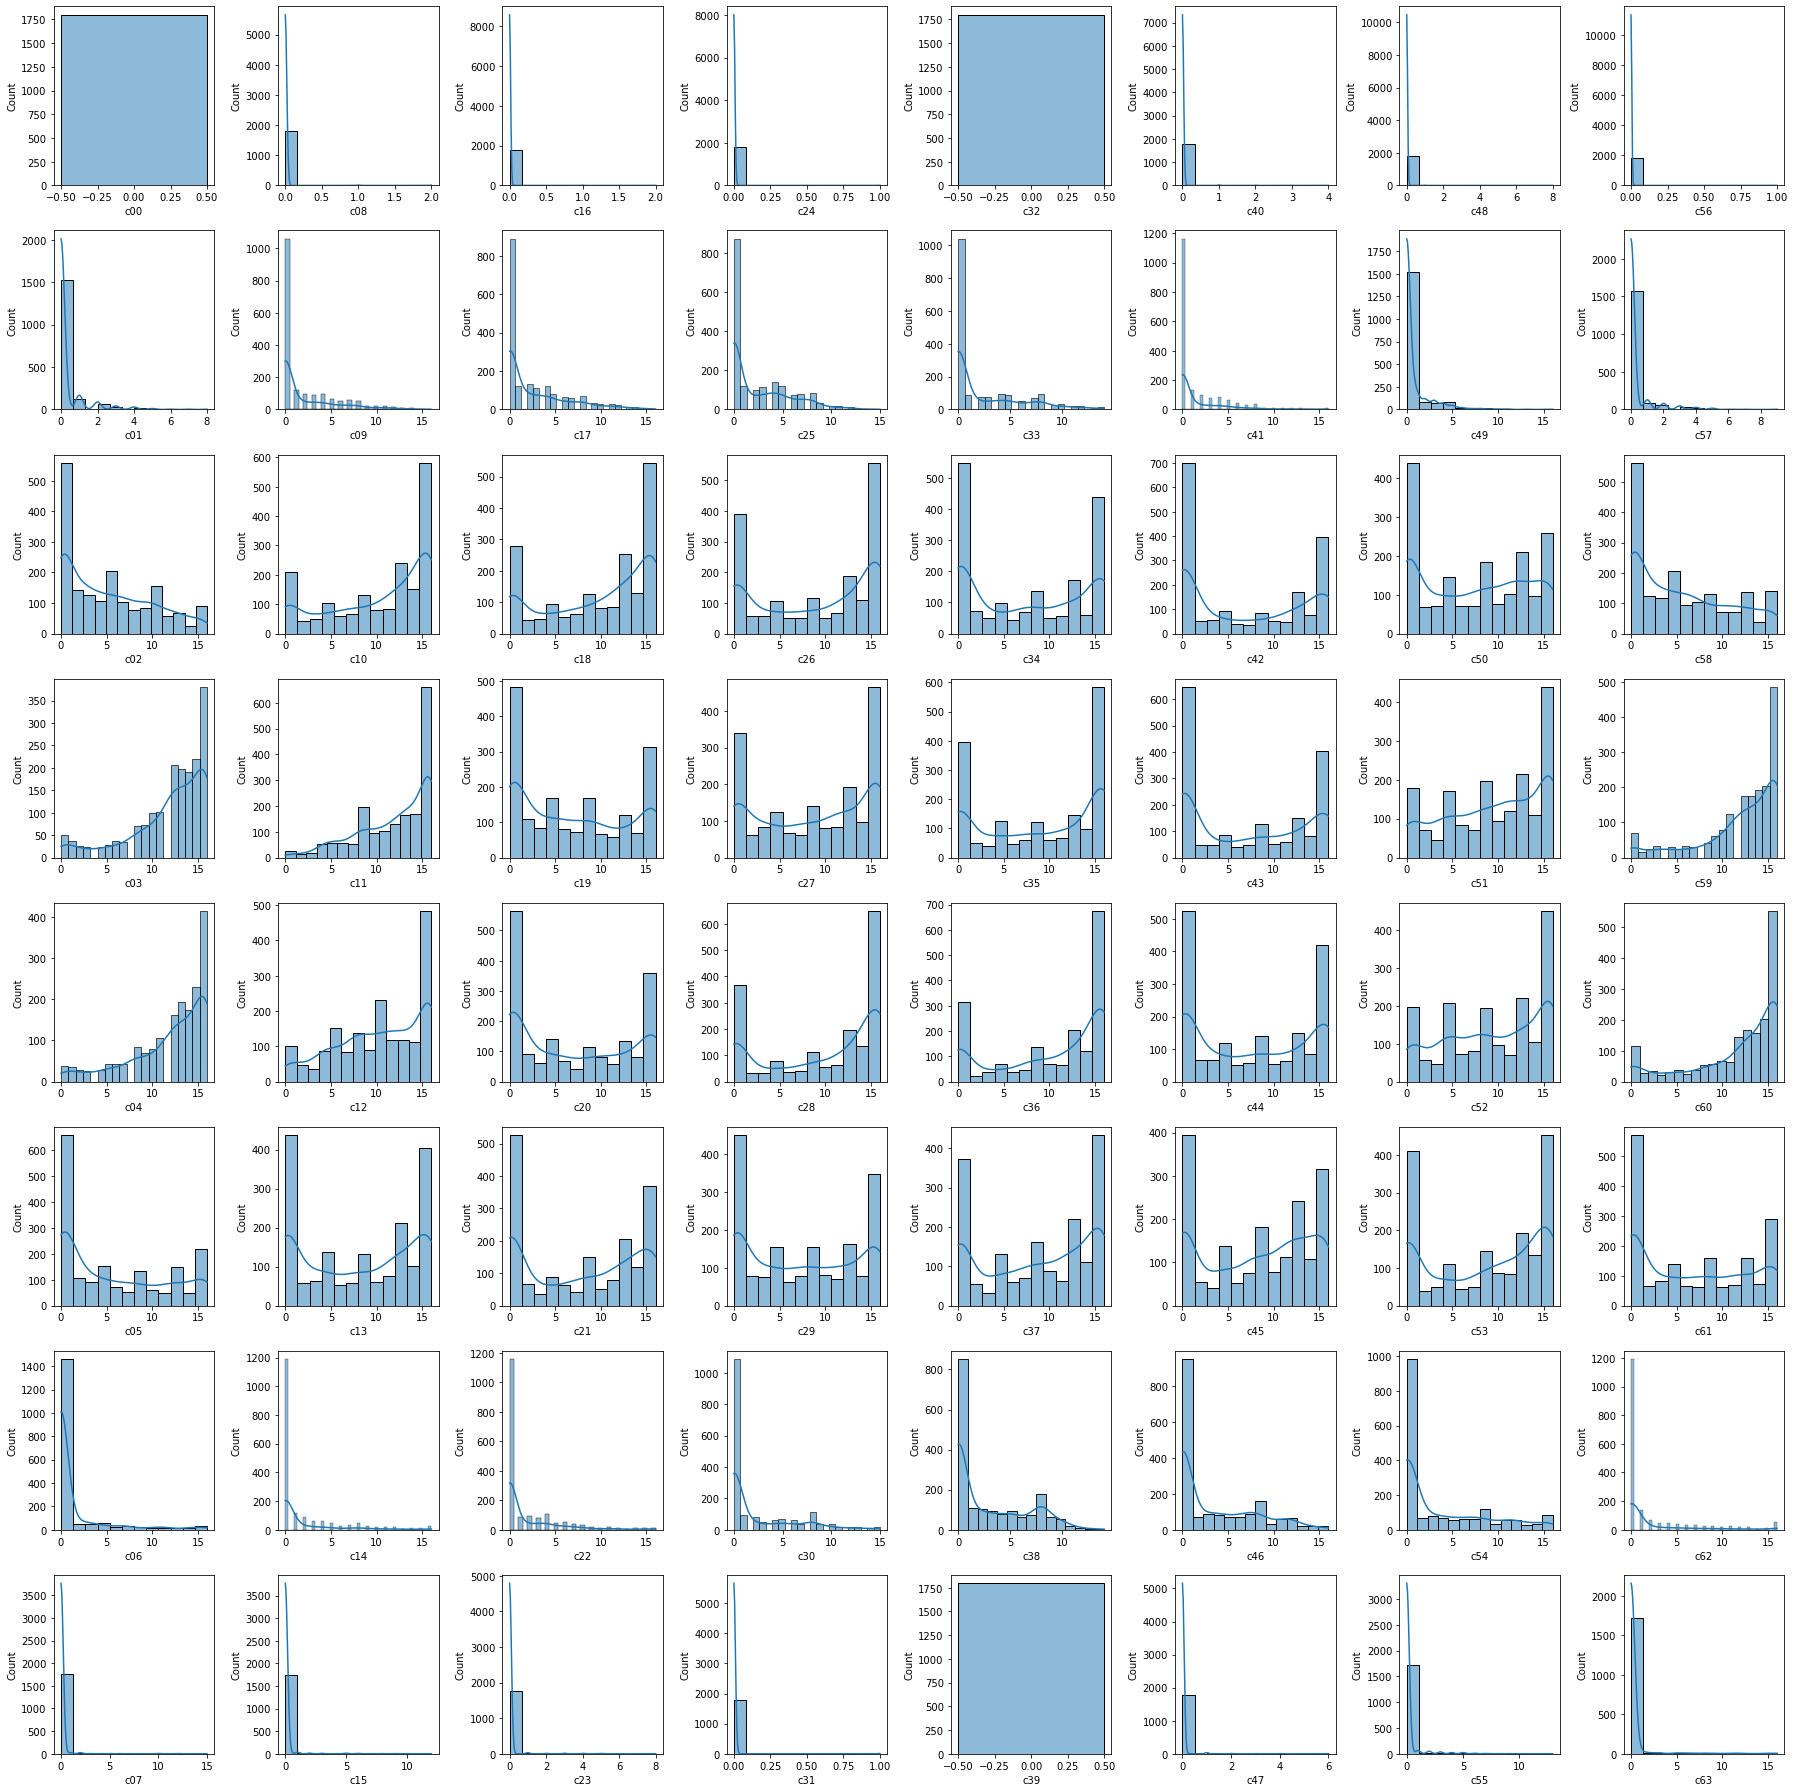

In [11]:
nx,ny = 8,8
columnas = digits.columns
i=0
fig, axs = plt.subplots(nx, ny, figsize=(25, 25))
for y in range(ny):
    for x in range(nx):
        sns.histplot(data = digits, x = columnas[i], kde=True, ax = axs[x,y])
        i+=1
        
fig.tight_layout()

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [12]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

Sugerencia: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

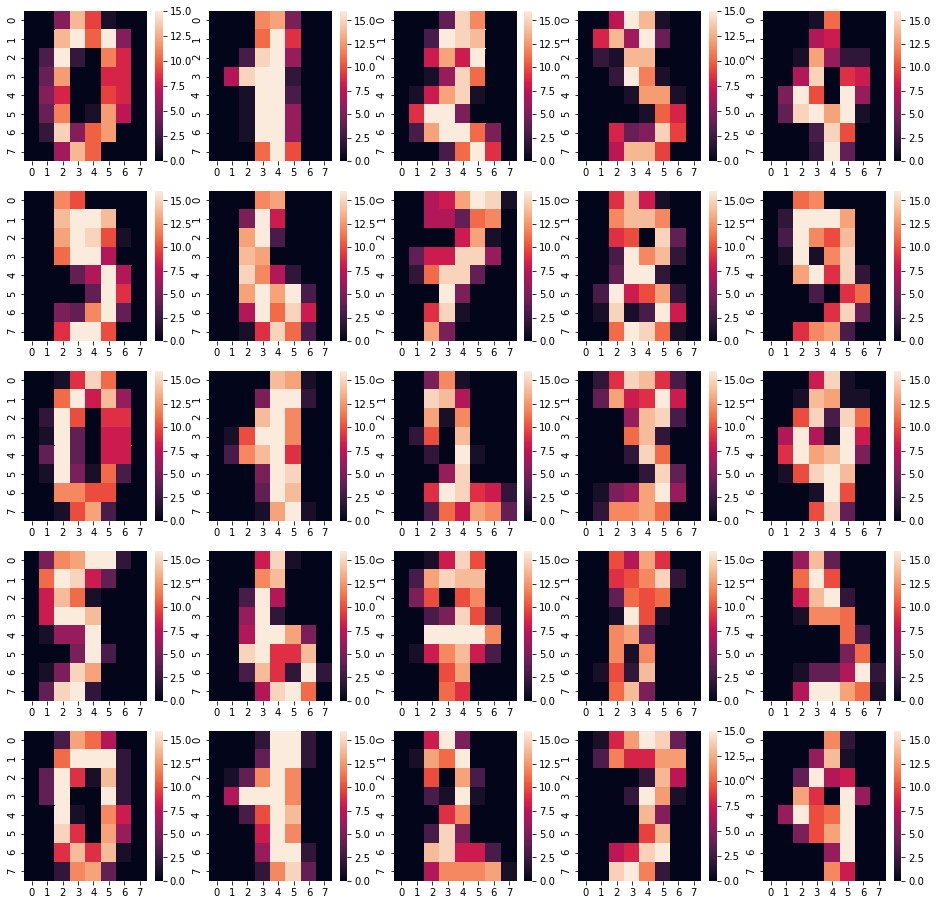

In [13]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(16, 16))
a = 0 
for i in range(nx):
    for j in  range(ny):
        sns.heatmap(digits_dict["images"][a], ax = axs[i,j])
        a+=1
plt.show()

fig.tight_layout()

#puede optimizarse

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [52]:
X = digits.drop(columns="target").values
y = digits["target"].values

#### Conjunto datos validación-entrenamiento-test

In [53]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)


print("X,y Shapes:", X.shape, y.shape)
print("X,y Train Shapes:", X_train.shape, Y_train.shape)
print("X,y Val Shapes:", x_val.shape, y_val.shape)
print("X,y Test Shapes:", x_test.shape, y_test.shape)

X,y Shapes: (1797, 64) (1797,)
X,y Train Shapes: (1437, 64) (1437,)
X,y Val Shapes: (180, 64) (180,)
X,y Test Shapes: (180, 64) (180,)


#### Modelos

In [54]:
#Librerias de metricas
from sklearn.metrics import f1_score as f1 #metrica clasificacion
from sklearn.metrics import roc_auc_score as AUROC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

##### Modelo 1: Random Tree

In [55]:
from sklearn.ensemble import RandomForestClassifier

param_grid={'n_estimators':[150,200,250],'max_depth':[2,3,4,5]}
   
clf= GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1, cv = 10) 
   
clf.fit(X_train, Y_train) 

v_val_1 = clf.predict(x_val)
v_test_1 = clf.predict(x_test)

print(clf.best_params_) 

Fitting 10 folds for each of 12 candidates, totalling 120 fits
{'max_depth': 5, 'n_estimators': 250}


##### Modelo 2: Regresión Logística

In [56]:
from sklearn.linear_model import LogisticRegression

param_grid={"C":np.linspace(1,5,1), "penalty":["l1","l2"], "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
   
LR= GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3,n_jobs=-1, cv = 10) 
   
LR.fit(X_train, Y_train) 

v_val_2 = LR.predict(x_val)
v_test_2 = LR.predict(x_test)

print(LR.best_params_) 

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\benit\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.95891123        nan 0.96936189 0.96380148
 0.96311189 0.95542444 0.96519037 0.96726884]
  warnings.warn(


{'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}


C:\Users\benit\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


##### Modelo 3: SVC

In [57]:
from sklearn.svm import SVC

param_grid={'C':np.linspace(1,6,1), 'kernel':['linear', 'poly', 'rbf']}
   
SV= GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1, cv = 10) 
   
SV.fit(X_train, Y_train) 

v_val_3 = SV.predict(x_val)
v_test_3 = SV.predict(x_test)

print(SV.best_params_) 

Fitting 10 folds for each of 3 candidates, totalling 30 fits
{'C': 1.0, 'kernel': 'poly'}


##### Modelo 4: K-Nearest Neighbours

In [58]:
from sklearn.neighbors import KNeighborsClassifier as KNC
param_grid = {'n_neighbors': [5,6,7,8,9,10,11,12,13,14,15], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute']}

neigh = GridSearchCV(KNC(), param_grid, refit = True, verbose = 3, n_jobs = -1, cv= 10)

neigh.fit(X_train, Y_train)

v_val_4 = neigh.predict(x_val)
v_test_4 = neigh.predict(x_test)
print(neigh.best_params_)

Fitting 10 folds for each of 66 candidates, totalling 660 fits
{'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}


##### Resultados 

In [59]:
ovr = 'ovo'

print('----------------------------------RESULTADOS-------------------------------------')
print('')
print('------------------------------------O--------------------------------------------')
print('Random Forest:')
print('')
print('Val F1:' + ' ' + ' ' +str(f1(y_val, v_val_1, average='macro')))
print('Test F1:' + ' ' + ' ' +str(f1(y_test, v_test_1,average='macro')))

print('---------------------------------O---------------------------------')

print('Regresion Logistica')
print(' ')
print('Val F1:' + ' ' + ' ' +str(f1(y_val, v_val_2, average='macro')))
print('Test F1:' + ' ' + ' ' +str(f1(y_test, v_test_2, average='macro')))

print('---------------------------------O---------------------------------')

print('SVC')
print(' ')
print('Val F1:' + ' ' + ' ' +str(f1(y_val, v_val_3, average='macro')))
print('Test F1:' + ' ' + ' ' +str(f1(y_test, v_test_3, average='macro')))


print('---------------------------------O---------------------------------')

print('K Neighbors')
print(' ')
print('Val F1:' + ' ' + ' ' +str(f1(y_val, v_val_4, average='macro')))
print('Test F1:' + ' ' + ' ' +str(f1(y_test, v_test_4, average='macro')))

----------------------------------RESULTADOS-------------------------------------

------------------------------------O--------------------------------------------
Random Forest:

Val F1:  0.934561742605221
Test F1:  0.9509332715108215
---------------------------------O---------------------------------
Regresion Logistica
 
Val F1:  0.9736866925768529
Test F1:  0.9708031695400117
---------------------------------O---------------------------------
SVC
 
Val F1:  0.9856521739130436
Test F1:  0.9934358974358976
---------------------------------O---------------------------------
K Neighbors
 
Val F1:  0.9802098266531782
Test F1:  0.9934358974358976


El mejor modelo en base al f1_score es el K Neighbors.

#### Matrices de confusión para los test

-----------------------------------RANDOM TREES--------------------------------------


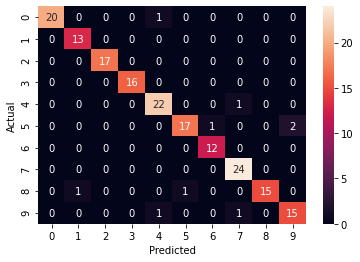

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

print('-----------------------------------RANDOM TREES--------------------------------------')
data_cf = {'y_Actual':    y_test,
        'y_Predicted': v_test_1
        }

df_cf = pd.DataFrame(data_cf, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_cf['y_Actual'], df_cf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

-----------------------------------REGRESION LOGISTICA--------------------------------------


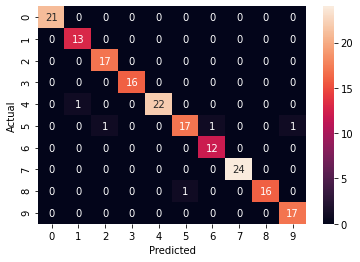

In [66]:
print('-----------------------------------REGRESION LOGISTICA--------------------------------------')
data_cf = {'y_Actual':    y_test,
        'y_Predicted': v_test_2
        }

df_cf = pd.DataFrame(data_cf, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_cf['y_Actual'], df_cf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

-----------------------------------SVC-------------------------------------


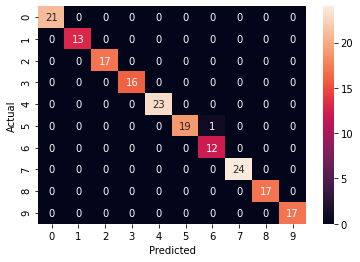

In [67]:
print('-----------------------------------SVC-------------------------------------')
data_cf = {'y_Actual':    y_test,
        'y_Predicted': v_test_3
        }

df_cf = pd.DataFrame(data_cf, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_cf['y_Actual'], df_cf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

-----------------------------------K-NEIGHBORS-------------------------------------


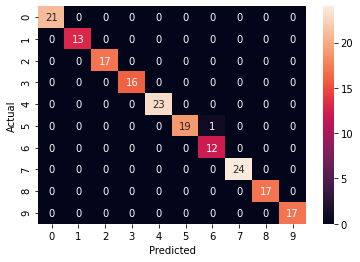

In [68]:
print('-----------------------------------K-NEIGHBORS-------------------------------------')
data_cf = {'y_Actual':    y_test,
        'y_Predicted': v_test_4
        }

df_cf = pd.DataFrame(data_cf, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_cf['y_Actual'], df_cf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

GridSearchCV es una cross validation que tunea hiperparámetros, en base a esto, se puede ver que se realizó en cada fold de la siguiente manera, por lo que no es necesario realizar un CV denuevo.

In [69]:
cv_df = pd.DataFrame(neigh.cv_results_)
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011170,0.000869,0.024435,0.003098,ball_tree,5,uniform,"{'algorithm': 'ball_tree', 'n_neighbors': 5, '...",1.0,0.993056,...,0.972222,0.972222,0.986111,0.993056,0.993007,0.986014,0.979021,0.986776,0.009038,2
1,0.012665,0.002602,0.019448,0.002412,ball_tree,5,distance,"{'algorithm': 'ball_tree', 'n_neighbors': 5, '...",1.0,0.993056,...,0.972222,0.972222,0.993056,0.993056,0.993007,0.986014,0.979021,0.987471,0.009225,1
2,0.012068,0.003744,0.023537,0.002608,ball_tree,6,uniform,"{'algorithm': 'ball_tree', 'n_neighbors': 6, '...",1.0,0.986111,...,0.965278,0.972222,0.986111,0.986111,1.000000,0.972028,0.972028,0.983294,0.011740,13
3,0.010670,0.000898,0.018551,0.002149,ball_tree,6,distance,"{'algorithm': 'ball_tree', 'n_neighbors': 6, '...",1.0,0.993056,...,0.965278,0.972222,0.993056,0.993056,1.000000,0.979021,0.979021,0.986082,0.011216,5
4,0.010672,0.000898,0.021742,0.000870,ball_tree,7,uniform,"{'algorithm': 'ball_tree', 'n_neighbors': 7, '...",1.0,0.986111,...,0.965278,0.972222,0.986111,0.986111,0.986014,0.965035,0.972028,0.980502,0.010713,29


### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una redcción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


#### Extracción

In [70]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Separamos las columnas objetivo
x_train = digits.drop(['c00','target'], axis=1) #Se dropean las columnas constantes mencionadas anteriormente
y_train = digits['target']

# Aplicando el algoritmo univariante de prueba F.
k = 25  # número de atributos a seleccionar
columnas = list(x_train.columns.values)
seleccionadas = SelectKBest(f_classif, k=k).fit(x_train, y_train)

C:\Users\benit\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [31 38] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\benit\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [71]:
catrib = seleccionadas.get_support()
atributos = [columnas[i] for i in list(catrib.nonzero()[0])]
digits_atributos = digits[atributos + ["target"]]
print("Atributos seleccionados:\n",atributos)

Atributos seleccionados:
 ['c02', 'c10', 'c13', 'c18', 'c19', 'c20', 'c21', 'c26', 'c27', 'c28', 'c30', 'c33', 'c34', 'c35', 'c36', 'c38', 'c42', 'c43', 'c44', 'c46', 'c53', 'c54', 'c58', 'c60', 'c61']


In [72]:
dfs_size = [digits.size,digits_atributos.size]
print("Size original", dfs_size[0], "elementos")
print("Size filtrado", dfs_size[1], "elementos")

Size original 116805 elementos
Size filtrado 46722 elementos


Se ve una gran reducción en el número total de datos, ahora, veremos los tiempos de ejecución de la predicción usando ambos datos y si hay cambios en los scores utilizando solo reducción de atributos.

In [73]:
import timeit #Para el tiempo

start = timeit.default_timer()

param_grid = {'n_neighbors': [5,6,7,8,9,10,11,12,13,14,15], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute']} #Hacemos el procedimiento de antes denuevo

neigh = GridSearchCV(KNC(), param_grid, refit = True, verbose = 3, n_jobs = -1, cv= 10)

neigh.fit(X_train, Y_train)

v_val_4 = neigh.predict(x_val)
v_test_4 = neigh.predict(x_test)

print(neigh.best_params_)

stop = timeit.default_timer() #tiempo de ejecucion

print('Time: ', stop - start)  

Fitting 10 folds for each of 66 candidates, totalling 660 fits
{'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}
Time:  6.019880100000137


In [77]:
from sklearn.model_selection import train_test_split

X_1 = digits_atributos.drop(columns="target").values 
Y_1 = digits_atributos['target']

X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_1, Y_1, test_size=0.2, random_state=42)
x_val_1, x_test_1, y_val_1, y_test_1 = train_test_split(X_test_1, Y_test_1, test_size=0.5, random_state=42)


print("X,y Shapes:", X.shape, y.shape)
print("X,y Train Shapes:", X_train.shape, Y_train.shape)
print("X,y Val Shapes:", x_val.shape, y_val.shape)
print("X,y Test Shapes:", x_test.shape, y_test.shape)

X,y Shapes: (1797, 64) (1797,)
X,y Train Shapes: (1437, 64) (1437,)
X,y Val Shapes: (180, 64) (180,)
X,y Test Shapes: (180, 64) (180,)


In [78]:
import timeit

start = timeit.default_timer()

param_grid = {'n_neighbors': [5,6,7,8,9,10,11,12,13,14,15], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute']}

neigh = GridSearchCV(KNC(), param_grid, refit = True, verbose = 3, n_jobs = -1, cv= 10)

neigh.fit(X_train_1, Y_train_1)

v_val_4_1 = neigh.predict(x_val_1)
v_test_4_1 = neigh.predict(x_test_1)

print(neigh.best_params_)

stop = timeit.default_timer()

print('Time: ', stop - start)  

Fitting 10 folds for each of 66 candidates, totalling 660 fits
{'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}
Time:  3.885893600000145


In [79]:
print('---------------------------------O---------------------------------')

print('K Neighbors')
print(' ')
print('Val F1:' + ' ' + ' ' +str(f1(y_val, v_val_4, average='macro')))
print('Test F1:' + ' ' + ' ' +str(f1(y_test, v_test_4, average='macro')))

print('---------------------------------O---------------------------------')

print('K Neighbors con datos reducidos')
print(' ')
print('Val F1:' + ' ' + ' ' +str(f1(y_val, v_val_4_1, average='macro')))
print('Test F1:' + ' ' + ' ' +str(f1(y_test, v_test_4_1, average='macro')))

---------------------------------O---------------------------------
K Neighbors
 
Val F1:  0.9802098266531782
Test F1:  0.9934358974358976
---------------------------------O---------------------------------
K Neighbors con datos reducidos
 
Val F1:  0.9675301490708467
Test F1:  0.9875099715099716


Se observa que da menor score con la reducción de datos, pero sigue siendo alto.

### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [93]:
def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
    
    
    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 
    model.fit(X_train, Y_train) # ajustando el modelo
    y_pred = model.predict(X_test)
    
    # Mostrar los datos correctos
    if label=="correctos":
        mask = (y_pred == y_test)
        color = "green"
        
    # Mostrar los datos correctos
    elif label=="incorrectos":
        mask = (y_pred != y_test)
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(12,12))
    for i in range(nx):
        for j in range(ny):
            index = j + ny * i
            data  = X_aux[index, :].reshape(8,8)
            label_pred = str(int(y_aux_pred[index]))
            label_true = str(int(y_aux_true[index]))
            ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
            ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
            ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
            ax[i][j].get_xaxis().set_visible(False)
            ax[i][j].get_yaxis().set_visible(False)
    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

Fitting 10 folds for each of 66 candidates, totalling 660 fits


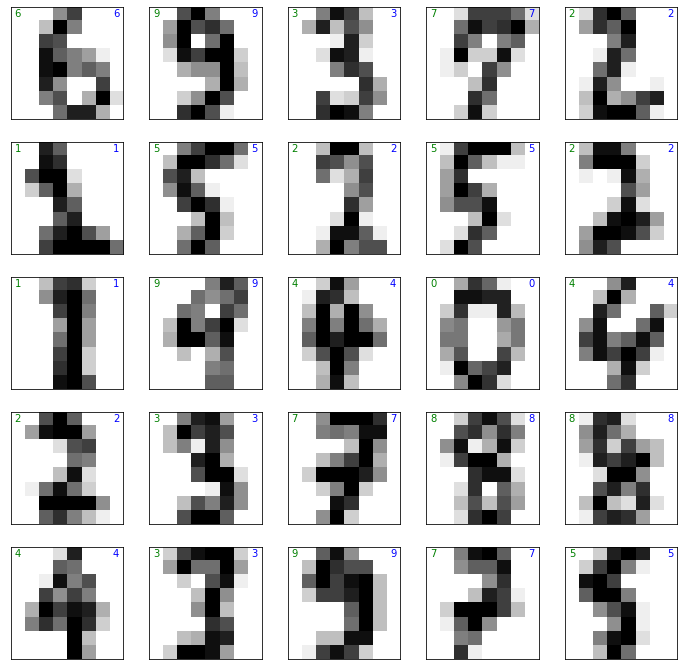

In [95]:
mostar_resultados(digits,neigh,nx=5, ny=5,label = "correctos")

En este caso, lo predicho y lo real fue igual. Puede no ocurrir el caso, pero como se muestra con el score f1 de antes, el modelo es bastante preciso.

### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

El modelo elegido es bueno, se podría mejorar quizás haciendo un TSNE para efectos rendimiento o un PCA, pero el modelo elegido logra predecir de buena manera lo querido. La dificultad radica en analizar bien los datos debido a la alta cantidad de estos, donde es díficil entender que representa cada columna.

## II.- California Housing Prices


<img src="https://www.wartsila.com/images/default-source/default-album/california_housing.tmb-1920x690.jpg?sfvrsn=126bc44_1" width="480" height="240" align="center"/>

Los datos se refieren a las casas encontradas en un distrito determinado de California y algunas estadísticas resumidas sobre ellas basadas en los datos del censo de 1990. Tenga en cuenta que los datos no se limpian, por lo que se requieren algunos pasos de procesamiento previo.

Las columnas son las siguientes, sus nombres se explican por sí mismos:

* longitude
* latitude
* housingmedianage
* total_rooms
* total_bedrooms
* population
* households
* median_income
* medianhousevalue
* ocean_proximity


El objetivo es poder predecir el valor promedio de cada propiedad. 
Para poder completar correctamente este laboratorio, es necesario seguir la siguiente rúbrica de trabajo:

1. Definición del problema
2. Estadística descriptiva
3. Visualización descriptiva
4. Preprocesamiento
5. Selección de modelo 
    1. Por lo menos debe comparar cuatro modelos
    2. Al menos tres de estos modelos tienen que tener hiperparámetros.
    3. Realizar optimización de hiperparámetros.
6. Métricas y análisis de resultados
7. Visualizaciones del modelo
8. Conclusiones

> **Observación**: Puede tomar como referencia lo realizado en la sección **I.- Clasificación de dígitos**. El alumno tiene la libertad de desarrollar un análisis más completo del problema (si así lo desea). Puede tomar como referencia el siguiente [link](https://www.kaggle.com/camnugent/california-housing-prices).

In [97]:
# read data
housing = pd.read_csv('data/housing.csv',sep=',')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Analisis de datos y preprocesamiento

In [98]:
print('Valores unicos ocean_proximity' +str(housing['ocean_proximity'].unique()))

Valores unicos ocean_proximity['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


En vista de que hay 4 valor distintos para ocean_proximity, le asignamos un valor a cada uno.

In [99]:
housing.isnull().sum(axis = 0)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Existen 207 datos NaN en total_bedrooms, asi que los eliminamos.

In [100]:
housing = housing.dropna()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [105]:
def pain_(texto): #Asignamos a cada proximidad un valor entero para analizarlas
    
  if texto == 'NEAR BAY':
    return 0
  if texto == '<1H OCEAN':
    return 1
  if texto == 'INLAND':
    return 2
  if texto == 'NEAR OCEAN':  
    return 3
  if texto == 'ISLAND':
    return 4

housing['ocean_proximity_n'] = housing.apply(lambda x: pain_(x['ocean_proximity']),axis=1)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_n
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [101]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


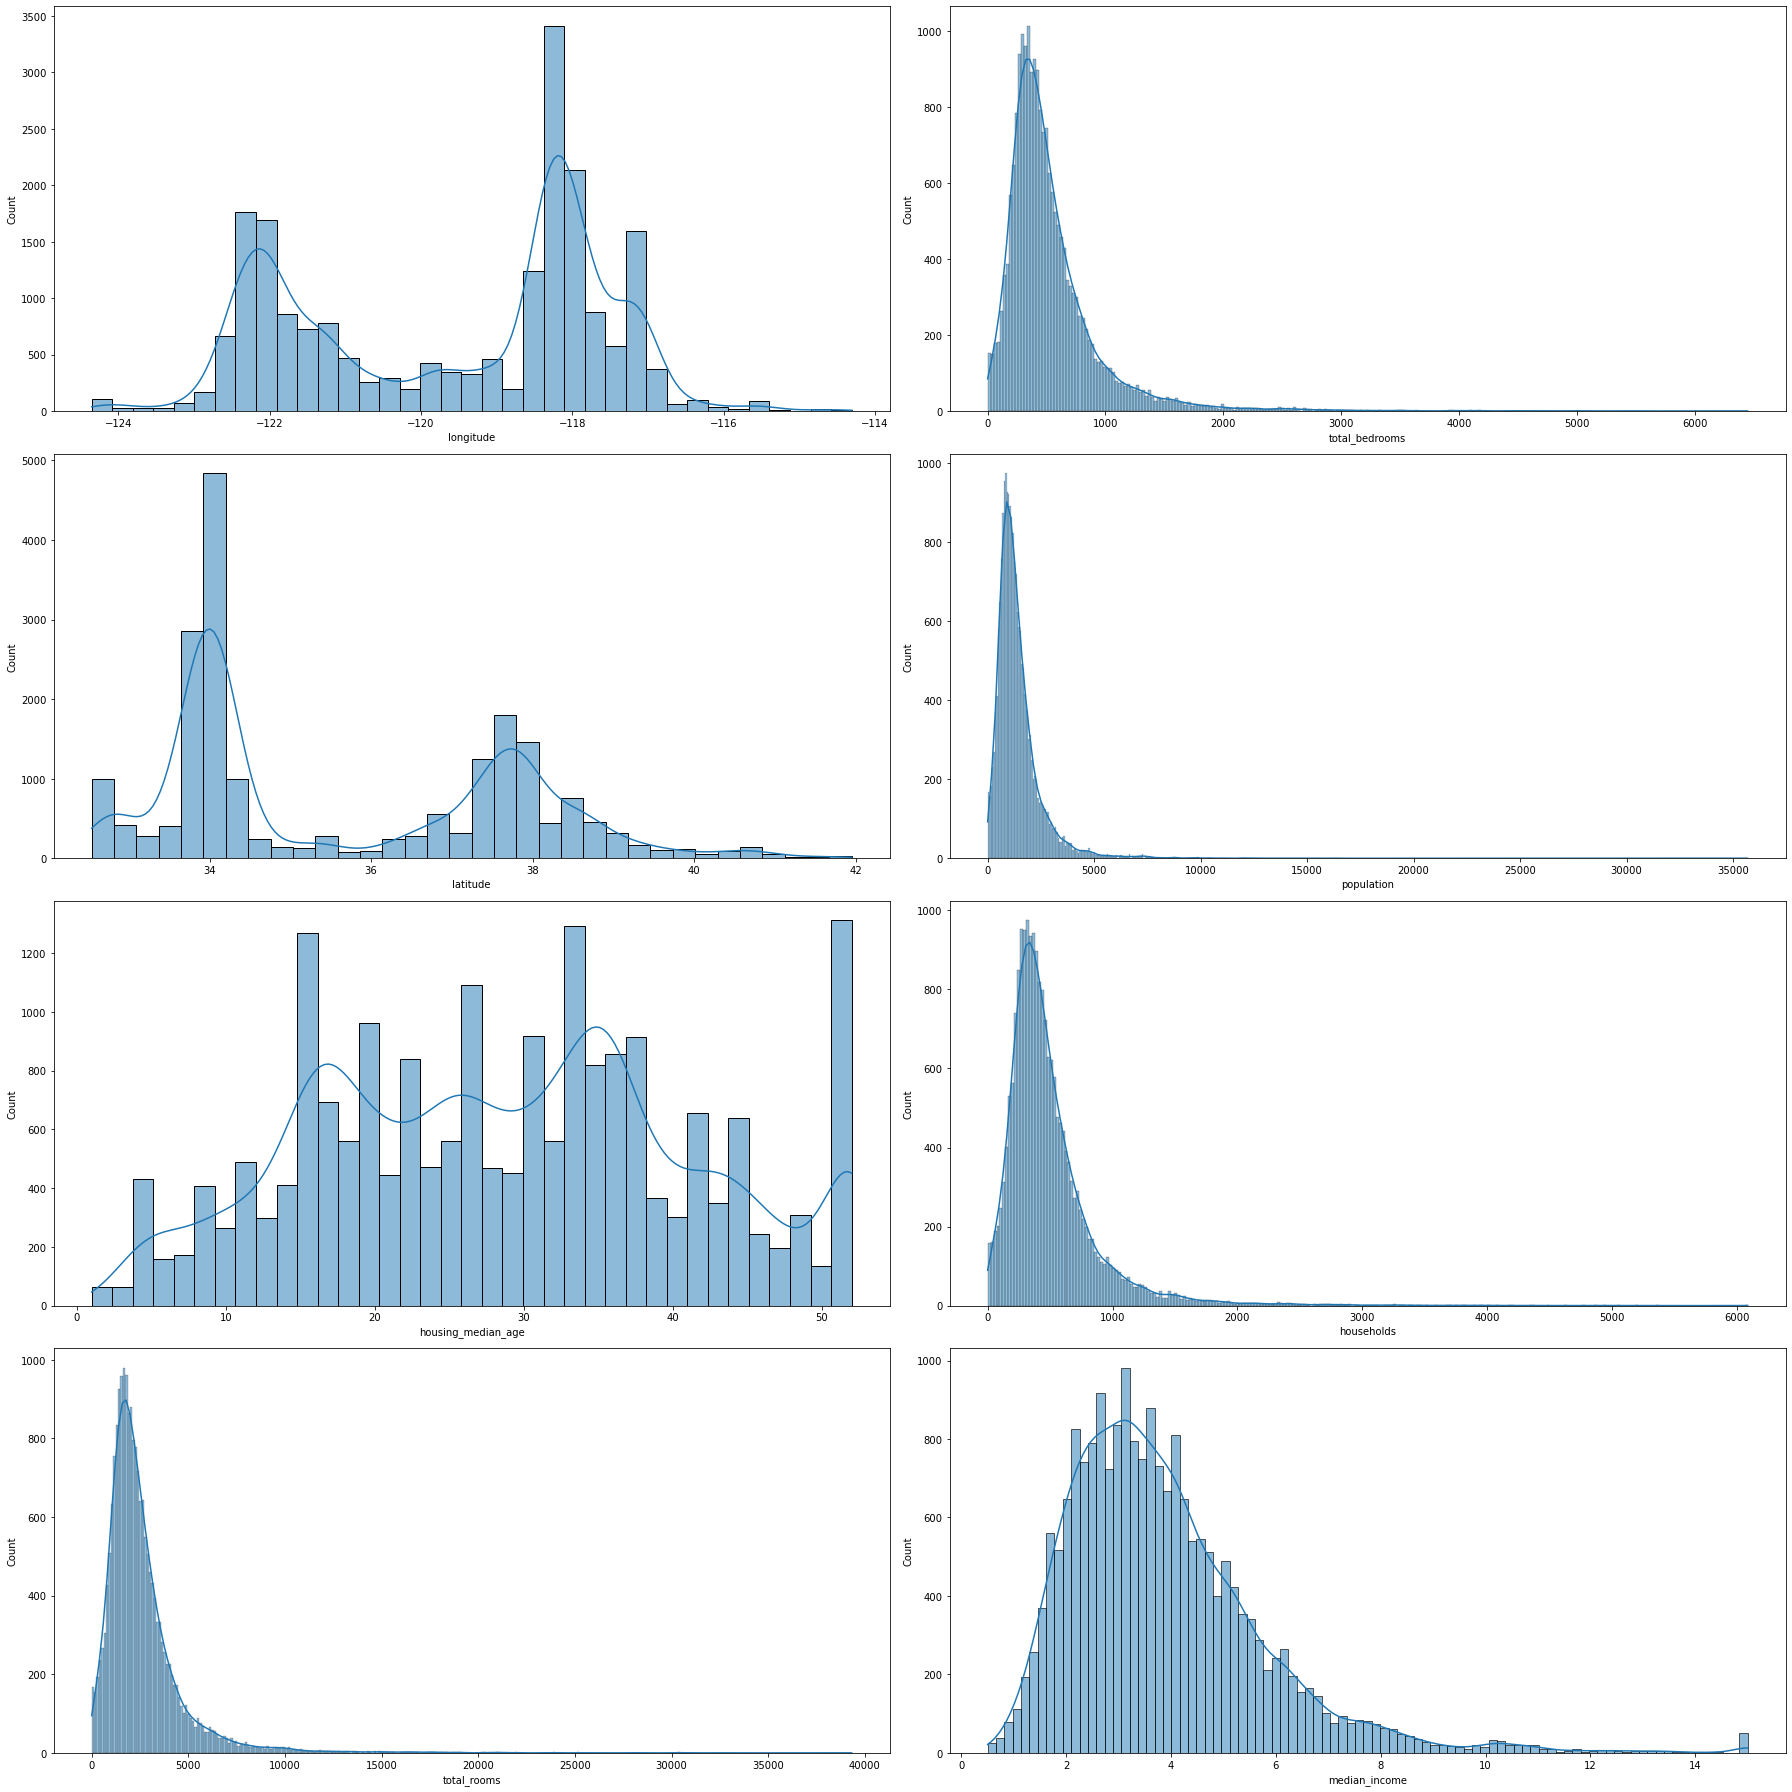

In [102]:
nx,ny = 4,2
columnas = housing.columns
i=0
fig, axs = plt.subplots(nx, ny, figsize=(25, 25))
for y in range(ny):
    for x in range(nx):
        sns.histplot(data = housing, x = columnas[i], kde=True, ax = axs[x,y])
        i+=1
        
fig.tight_layout()

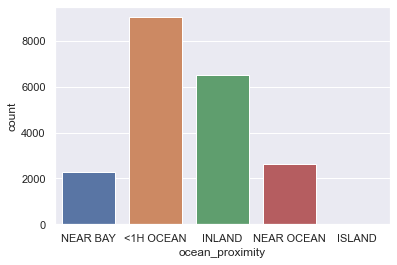

In [108]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="ocean_proximity", data=housing)